<a href="https://colab.research.google.com/github/ilante/AML_91934_exam/blob/main/Englander_AML_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Project

## Fashion-MNIST 

### International Master of Bioinformatics, University of Bologna

#### Immanuela Antigone Engländer

## 1. Aim of this Project

The goal of this project is to apply several Machine Learning approaches for the clasiffication of 10 different labels

First, a *Exploratory Data Analysis* will be performed to summarize the main features of the dataset. Then, after processing the data, different Machine Learning (ML) methods will be compared in terms of accuracy score. The ML methods developed are:

1. Artificial Neural Network (ANN)
2. k-nearest neighbors (k-NN)
3. Support Vector Machine (SVM)
4. Decision Tree (DT)
5. Random Forest (RF)
6. Convolutional Neural Network (CNN)

In particular, for each Machine Learning method two procedures are used for training and testing:

1. train-test split;
2. 5-fold cross-validation.

The highest accuracy for both procedures is computed optimizing the values of some parameters such as seed (`random_state`) and number of folds (`5_splits`). Different statistical measures are computed for the best model obtained:

- The **F1 score** can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)
In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

- **accuracy** is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined

  $ACC = \frac{TP + TN}{TP + TN + FP + FN}$

- **recall** (also known as true positive rate or sensitivity) is the proportion of positives that are correctly identified;

  $TPR = \frac{TP}{TP + FN}$ 

- **precision** (also known as positive predicted value) is the fraction of correct positive prediction over the total of positive predictions;

  $PPV = \frac{TP}{TP + FP}$


- **confusion matrix**: is a specific table storing the number of true positives (TP), true negative (TN), false positive (FP) and false negative (FN) that have been predicted by a supervised ML method


The best method is selected according to the highest mean accuracy score between train-test split and *k*-fold cross-validation. At the end, Ensamble methods are developed to study if the final accuracy reached by single ML apporaches can be improved.

# 1.1 Background of the Data Set

The dataset is taken from Zalando's article images with a considerable size of 60 000 samples and a test set of 10 000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes. The Fashion-MNIST serves as a variant of original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

I choose it to be sure that I don't have the same project as my fellow students.

Here an example of how the data looks like

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/fashion-mnist-example-img.png)

The authors of Fashion-MNIST argue that it may replace the original MNIST. So far the original has been used as a benchmark. But they argue that the original may be to simple. Reasons to choose Fashion-MNIST over the original are:

* **MNIST is too easy**. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."

* **MNIST is overused.** In [this April 2017 Twitter thread](https://twitter.com/goodfellow_ian/status/852591106655043584), Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
* **MNIST can not represent modern CV tasks**, as noted in [this April 2017 Twitter thread](https://twitter.com/fchollet/status/852594987527045120), deep learning expert/Keras author François Chollet.


## Reference of Fashion-MNIST:

https://arxiv.org/abs/1708.07747 

Here the abstract;

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/citation.png)

# 2. Importing the Required Libraries

In [ ]:
# to disconnect the runtime
# that way I can reconnect before going to bed and train a model on the full
# 12hrs they allocate per session

!kill -9 -1

In [1]:
# # !pip install -q colabcode
# # from colabcode import ColabCode

# # Loading module to monitor time:
!pip install ipython-autotime
%load_ext autotime

# to measure execution time
import time

time: 2.45 ms (started: 2021-12-12 19:56:15 +00:00)


Libraries:

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import sklearn

# k-fold Cross Validation
from sklearn.model_selection import cross_val_score
# PCA
from sklearn.decomposition import PCA
# SVM
from sklearn.svm import SVC
from sklearn import metrics
# Grid search for SVM: maybe make smaller test runs for gridsearch???
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
# KNN
from sklearn.neighbors import KNeighborsClassifier
# DT
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

time: 18.4 ms (started: 2021-12-12 21:41:13 +00:00)


We import the Fashion-MNIST set from keras in an already vectorized numpy format:

In [3]:
f_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# REMEMBER TO run cell that changes the range from [0, 255] to [0, 1] 
# when rerunning

4431872/4422102 [==============================] - 0s 0us/step
time: 1 s (started: 2021-12-12 19:56:41 +00:00)


In [ ]:
train_images.shape

(60000, 28, 28)

time: 4.32 ms (started: 2021-12-11 20:12:12 +00:00)


In [ ]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
time: 2.87 ms (started: 2021-12-11 19:31:49 +00:00)


In [ ]:
copy_train_labels = train_labels
train_labels_list = copy_train_labels.tolist()
print(type(train_labels_list))

copy_test_labels = test_labels
test_labels_list = copy_test_labels.tolist()
print(type(test_labels_list))

<class 'list'>
<class 'list'>
time: 7.1 ms (started: 2021-12-11 19:31:53 +00:00)


In [ ]:
# distribution of labels in training set
for i in range(10):
  print('class', i , ' ', train_labels_list.count(i))

class 0   6000
class 1   6000
class 2   6000
class 3   6000
class 4   6000
class 5   6000
class 6   6000
class 7   6000
class 8   6000
class 9   6000


In [ ]:
# distribution of labels in testing set
for i in range(10):
  print('class', i , ' ', test_labels_list.count(i))

class 0   1000
class 1   1000
class 2   1000
class 3   1000
class 4   1000
class 5   1000
class 6   1000
class 7   1000
class 8   1000
class 9   1000


In [ ]:
for i in range(len(class_names)):
  print(str(i)+'. ', class_names[i])

0.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot
time: 1.69 ms (started: 2021-12-07 14:01:53 +00:00)


The data set contains 10 different classes: 

1.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot



# 2.1 Exploring the Data

Lets see how many samples we got;

In [ ]:
# inspect train_images
print('train_images: ', train_images.shape)
# n of labels:
print('n of train_labels: ', len(train_labels))
print('\n')
# inspect test_images
print('test_images: ', test_images.shape)
# n of labels in test set
print('n labels in test_images: ', len(test_labels))

train_images:  (60000, 28, 28)
n of train_labels:  60000


test_images:  (10000, 28, 28)
n labels in test_images:  10000
time: 2.55 ms (started: 2021-12-07 14:01:53 +00:00)


# 2.2 Preprocessing and Reshaping the Data

By inspecting an original image we can see that it is scaled in the range [0, 255] but we prefer to have a scaling from [0, 1] &rarr; thus we have to divide each pixel value by **255**.

Below an image of a pullover item 707 from the training set.



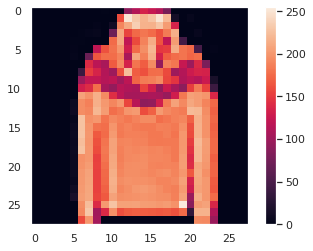

time: 364 ms (started: 2021-12-07 14:01:53 +00:00)


In [ ]:
plt.figure()
plt.imshow(train_images[707])
plt.colorbar()
plt.grid(False)

# !!!!!! Normalizing the data run everytime you restart!!!

The images inside f_minst are black and white and you get a value between 0 and 255. Where black is 0.
We convert **both** training AND testing set to scale from [0, 1]:

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

time: 199 ms (started: 2021-12-12 19:57:25 +00:00)


# 2.3 Example images from both training - and testing set:

Here  9 examples from the training set:


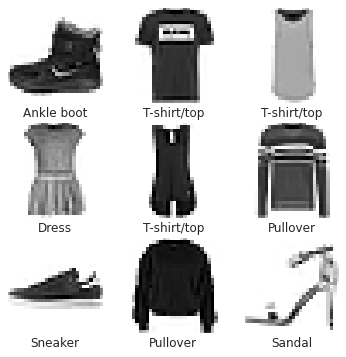

time: 368 ms (started: 2021-12-07 14:01:54 +00:00)


In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Here nine sample images of the testing set:

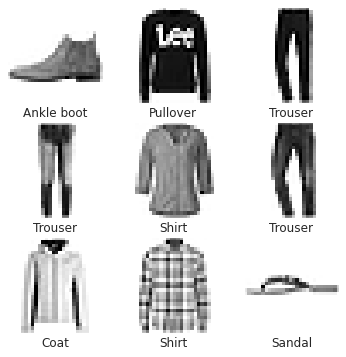

time: 335 ms (started: 2021-12-07 14:01:54 +00:00)


In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

## 2.4 Visualizing the distribution of classes within training and testing set:

It is crucial to inspect the distribution of classes, as a skewed data set is prone to overfitting and not able to generate a model that is able to **generalize for unseen data**. We decided to do a count plot as it is a good way to visualize the distribution of classes. The first figure shows the distribution of the 9 classes of the training set, while the second figure shows the distribution of the testing set. We can appreciate that both sets are balanced.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

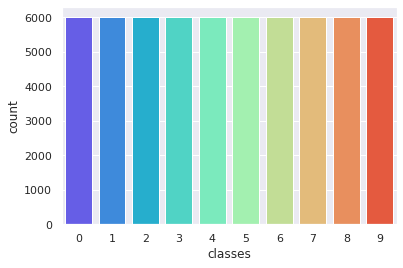

time: 239 ms (started: 2021-12-07 14:01:55 +00:00)


In [ ]:
# Plotting dist. training set:
count_plt = sns.countplot(train_labels,palette="rainbow")
count_plt.set(xlabel='classes', ylabel='count')

In [ ]:
get_count_per_class(np.argmax(y_val,axis=1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

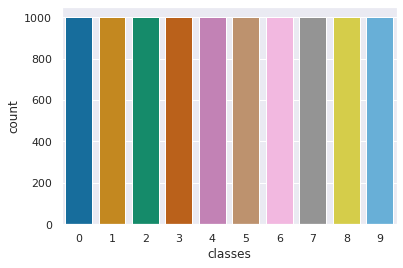

time: 206 ms (started: 2021-12-07 14:01:55 +00:00)


In [ ]:
# Plotting dist. testing set:
count_plt = sns.countplot(test_labels,palette="colorblind")
count_plt.set(xlabel='classes', ylabel='count')

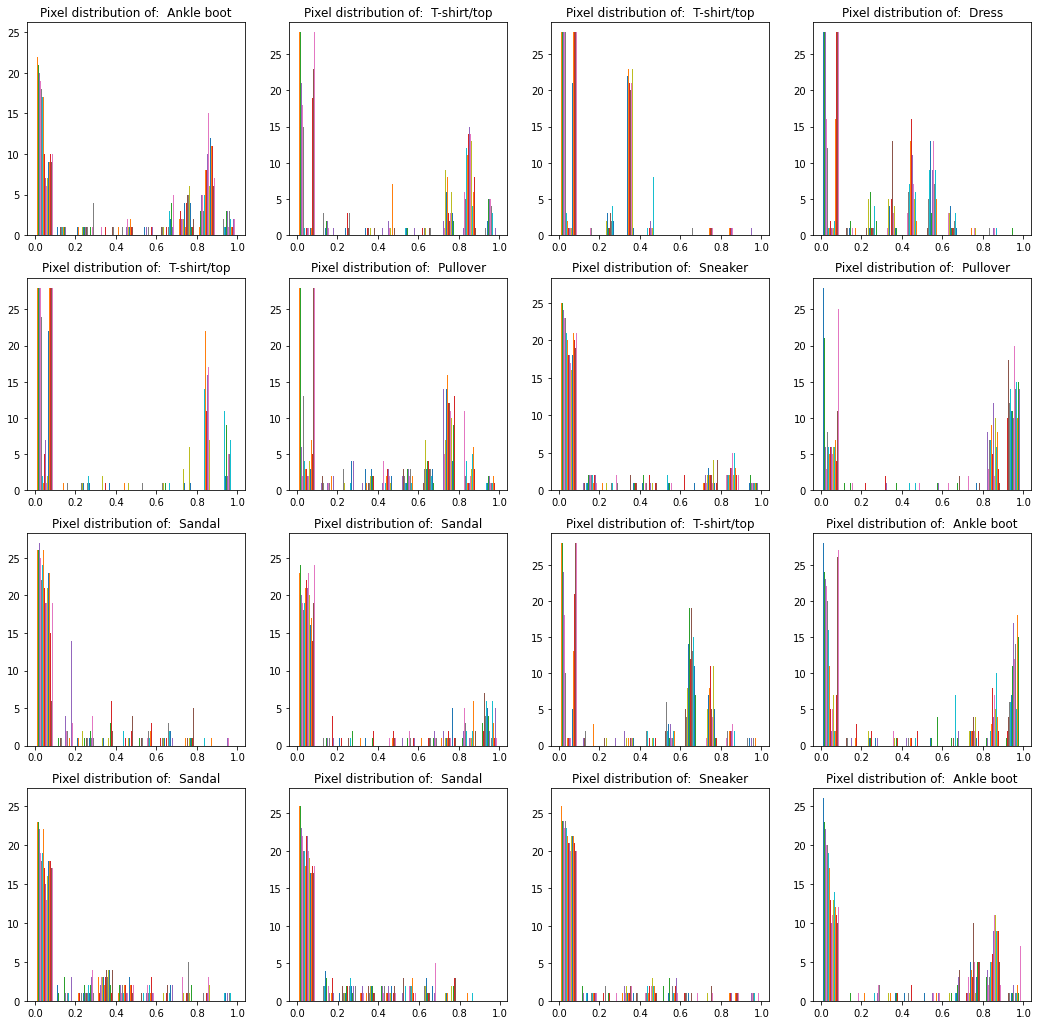

time: 10.1 s (started: 2021-12-12 19:58:33 +00:00)


In [5]:
plt.figure(figsize=(18,18))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.hist(train_images[i])
  plt.title(f'Pixel distribution of:  {class_names[train_labels[i]]}')
plt.show()

# 3. Building a Model using Neural Networks

Aka as Artificial Neural Networks (ANN) are a subeset of ML methods that are at the core of deep learning algorithms. Their structure was inspired by the biological neurons of the brain which coined their name Neural Networks (NN).

NNs are made of a node layers that contain an input layer, one or more hidden layers and an output layer. Each artificial neuron connects to another and has an associated threashold and and associated weight.

To build the NN we have to configure the layers of the model before compiling it.

## 3.1 Setting up the Layers of the NN

The layers are the basic building blocks of an NN and extract the representations from the given data. Most of deep learning consists of chaining together these layers. Layers as `tf.keras.layres.Dense` have apramenters that are learned during the training. 

For our training we will use the Rectified Linear Unit (ReLU). It is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 **or less** [see](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

Here and image of the ReLU:

![](https://s2.qwant.com/thumbr/474x351/f/e/354d8f54c966180968777154786e5562a78953d12002e5e24010e54e3cfcf1/th.jpg?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.FZ3MiYnlLaNu6igVodW4LQHaFf%26pid%3DApi&q=0&b=1&p=0&a=0)



The first layer in my network `tf.keras.layers.Flatten` transforms the format of the images from a 2-dimensional array
(of 28 * 28 = 748 pixles) to a one dimensional array holding 784 pixels
This layer basically is 'unstacking' the rows of pixles in the image and lining them up.
This layer does NOT have to learn any parameters; it only reformats the data.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


time: 215 ms (started: 2021-12-07 14:02:05 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
time: 5.36 ms (started: 2021-12-07 15:29:16 +00:00)


After flattening the pixels, the network is composed of a sequence of two `tf.keras.layers.Dense` layers. They are densely connected, or fully connected neural layers. The first layer has 128 neurons. The last layer returns a logits array of lenght 10. Each neuron will contain a score for the current image corresponding to the classes.

## 3.2 Compiling the Model

To get the model ready for training it needs some more settings. We add them during the model's **compile** step.

* We need to set a **loss function** (aka error function). It measures how accurate the model is during the training. Obviously we want to minimize this function to minimize the error and 'steer' the model into the right direction.
* We need an **optimizer** which defines how the model is updated based on the data that it is given and depending on the **loss function**. Here we use an optimizer that implements the Adam algorithm.
* Metrics are used for monitoring training and testing steps. Here we use accuracy = the fraction of images that are correctly classified.



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


time: 9.86 ms (started: 2021-12-07 14:02:05 +00:00)


## 3.3 Training the Model

The training of a nn model requires 4 steps:

1. Feeding the training data to the model. The training data here is held by the two arrays; `train_images` and `train_labels`

2. The model has to learn the associated images and labels

3. Testing the model by making predictions on an independent test set &rarr; `test_images` array

4. Verifying that the predictions made actually match the labels by comparing the predicted lables to the `test_labels` array

## 3.1.1 Feeding the Model

To initiate training we call the `model.fit` method. The name is very descriptive. As it fits the model to the training data.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3778 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3145 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2971 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2703 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2577 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.241

time: 29 s (started: 2021-12-07 14:02:05 +00:00)


We can see how the model trains and in the starndard output above we see accuracy in output for each epoch. Our model reaches an accuracy of ~ 0.91 = 91% of the images are correctly classified.

## 3.1.2 Evaluating the Accuracy on our Testing set

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test loos: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_acc))

313/313 - 0s - loss: 0.3437 - accuracy: 0.8819 - 253ms/epoch - 809us/step
Test loos: 0.34367984533309937
Test accuracy: 0.8819000124931335
time: 349 ms (started: 2021-12-07 16:11:24 +00:00)


We can see that the accuracy was slightly lower with only ~ 89% of images correctly classified. The difference between the training and testing accuracy can be explained by *overfitting*. So we know that the model has 'memorized' the noise and details in the training dataset this leads to the slightly lower performance on the testing set (or any new unseen data).

We can mitigate overfitting by:

* Getting more training data
* Reducing the capacity of the network
* Adding weight regularization
* Adding dropout
* Data augmentation
* Batch normalization

Usually it is best to combine the above methods.

As the goal for this project is to show several methods, we wil however continue with the model as is.


## 3.1.3 Testing the Model by Making Predictions on an Independent Test Set 

The independent testing set is our `test_images` array. Logits is the vector of raw (non-normalized) predicitons that a classification model generates. It is then passed to a normalization function, in our case the `softmax` function. The `softmax` function generates a vector of normalized probabilities with one value for each possible class. These probabilities are easy to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


time: 958 ms (started: 2021-12-07 14:02:35 +00:00)


Now the model has predicted the label of **each** image in the **testing_set**. Below we are inspecting the first prediction:

In [ ]:
print(predictions[0])
print(len(predictions[0]))

[3.1837157e-09 3.2106282e-08 4.2215670e-10 3.5235679e-09 5.8144805e-09
 7.0657006e-05 1.4703160e-09 2.0182377e-03 9.4068916e-08 9.9791092e-01]
10
time: 3.31 ms (started: 2021-12-07 14:02:36 +00:00)


We can appreciate that each prediciton is an array of 10 numbers, which represent the models confidence that the image corresponds to each of the 10 different classes (labels of clothing). The label with the highest confidence is the class called for the item.

In [ ]:
print(np.argmax(predictions[0]))

print('\n') # forcing autotime to print into next line


9


time: 3.08 ms (started: 2021-12-07 14:02:36 +00:00)


In [ ]:
class_names[9]

'Ankle boot'

time: 3.24 ms (started: 2021-12-07 14:02:36 +00:00)


We now know that the model is most confident that the class of that the image is an ankle boot. To find out weather this call was correct we can examine the `test_labels`:

In [ ]:
test_labels[0] # dunno why time module is printed right after 9

9

time: 3.55 ms (started: 2021-12-07 14:02:36 +00:00)


## 3.1.4 Verifying predictions

First we write functions to visualize the full set of 10 class predictions.

Then we make predictions about some images using the trained model.



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


time: 18 ms (started: 2021-12-07 14:02:36 +00:00)


As you can see in the function above: correctly classified images are labelled green while wrongly classified ones are red.

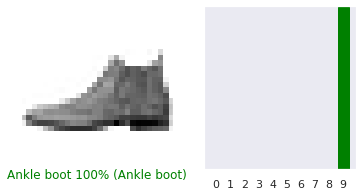

time: 169 ms (started: 2021-12-07 14:02:36 +00:00)


In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


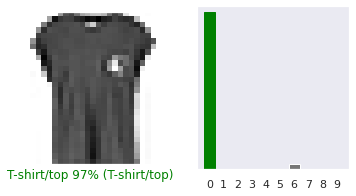

time: 183 ms (started: 2021-12-07 14:02:36 +00:00)


In [ ]:
i = 113
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


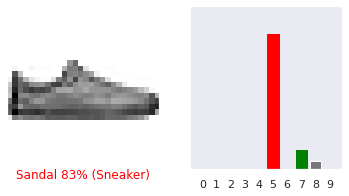

time: 176 ms (started: 2021-12-07 14:02:36 +00:00)


In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Below we are plotting several images including their predictions in a grid: We can see that the model can be wrong (red) even if it is very confident.

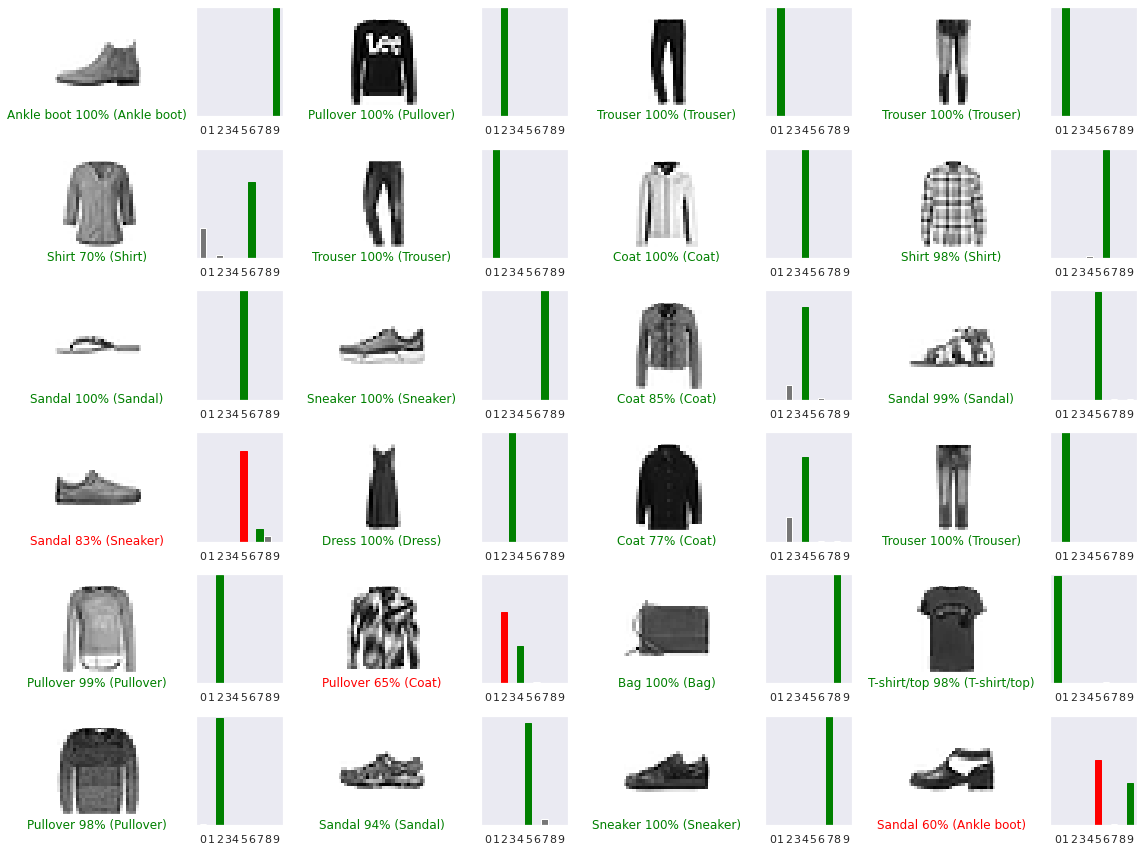

time: 4.68 s (started: 2021-12-07 14:02:36 +00:00)


In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# NN CONFUSION

In [ ]:
# predicted = model1.predict(X_test) 
test_predicted = np.argmax(predictions, axis=1) #predictions
# generating confusion matrix using the test set labels and the predictions of the test set:
nn_confusion = confusion_matrix(test_labels, test_predicted)
print(confusion)

[[853   1  21  48   6   2  60   0   9   0]
 [  0 972   0  22   3   0   2   0   1   0]
 [ 13   1 841   6  83   1  54   0   1   0]
 [ 18   2  13 882  59   0  21   0   5   0]
 [  0   1 122  14 811   0  49   0   3   0]
 [  0   0   0   1   0 940   0  30   0  29]
 [143   0 106  42  69   0 631   0   9   0]
 [  0   0   0   0   0   7   0 926   0  67]
 [  3   0   5   2   3   2   2   3 980   0]
 [  0   0   0   0   0   6   1  10   0 983]]
time: 5.78 ms (started: 2021-12-07 14:24:32 +00:00)


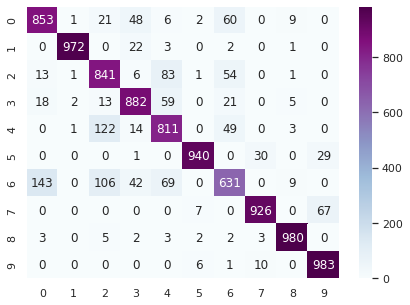

time: 479 ms (started: 2021-12-07 14:44:41 +00:00)


In [ ]:
f,ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion, annot=True, cmap="BuPu", fmt='',ax=ax)
plt.show()

In [ ]:
print(type(class_names))
for i in class_names:
  print(i, end=", ")

<class 'list'>
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot, time: 4.99 ms (started: 2021-12-07 16:42:56 +00:00)


In [ ]:
tp_list = [] # generating list of true positives
for i in range(len(confusion)):
  print(confusion[i][i], class_names[i])
  tp_list.append(confusion[i][i])

print('\n')
print('True positives: ')
print(tp_list, '\n')
tp_list.sort()
print('True positives sorted: ')
print(tp_list, '\n')

<class 'numpy.ndarray'>
853 T-shirt/top
972 Trouser
841 Pullover
882 Dress
811 Coat
940 Sandal
631 Shirt
926 Sneaker
980 Bag
983 Ankle boot


True positives: 
[853, 972, 841, 882, 811, 940, 631, 926, 980, 983] 

True positives sorted: 
[631, 811, 841, 853, 882, 926, 940, 972, 980, 983] 

time: 5.95 ms (started: 2021-12-07 16:58:08 +00:00)


# Discussing the differences in true positives

Looking at the diagonal in the heatmap above we can see all true positives (TP). That is, the predicted class is in congruence with the label of the class.

I have extracted all TP into a list and sorted them from smallest to largest. As outlined in data exploration the classes of the **testing set** were completely balanced thus we can draw direct conclusions.

Labels sorted from least TP to highest TP value:

1. Shirt 631 
2. Coat 811
3. Pullover 841
4. T-Shirt/top 853
5. Dress 882
6. Sneaker 926
7. Sandal 940
8. Trouser 972
9. Bag 980
10. Ankle boot 983

The first three might have had these lower scores given their similar pixle distribution. It is evident to the human eye that shirts coats and pullovers all have the same shape. While the difference in shape between sandals, ankle boots and sneakers is more pronounced and thus might lead to a pixel profile that is more distinguishable.

# SVM

# Concattenate for full run

# Flatten

In [6]:
# Flatten both test and train arrays
train_images_f = train_images.flatten().reshape(60000,784)
test_images_f = test_images.flatten().reshape(10000,784)
print(train_images_f.shape)
print(test_images_f.shape)

(60000, 784)
(10000, 784)
time: 225 ms (started: 2021-12-12 20:01:41 +00:00)


# SVM Grid Search 5-fold Cross Validation on Reduced Set

To reduce computational time of the grid search with 5-fold corss validation I only the training set (as imported from `tf.keras`). 

That means that for the train test split I will do the oposite of what is usually done. I will use the **smaller portion** for **training** as it is more computationally intensive than testing.

I will use 10% of the 60 000 samples for training while I will use the bulk of the samples for (90%) for testing. I chose this as I wanted to speed up the step of the grid search. From the grid search we can find the best parameters. I will use them to train a model using the entire input and testing on the corresponding testing set.

Once the best parameters are found, I will build a model using the **original train test splits** as imported from `tf.keras` and do a final test of performance. This will be done by again using the `train_test_split` function but this time on the entire data set. The model will built with the usual 

```
# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# test model on test set and print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
```

[A user's guide to support vector machines, Asa Ben-Hur, Jason Weston](https://pubmed.ncbi.nlm.nih.gov/20221922/)

From the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

>The implementation is based on **libsvm**. The fit **time scales at least quadratically** with the number of samples and may be **impractical beyond tens** of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

In [ ]:
# SVM Model: Reduced train set
# Grid search CV: using testing set because it is smaller and split it into test 

# Randomly picking ONLY 10 percent of the 10 000 entries to do the gridsearch.
# That way I can speed up the computation and still pick the best model
# This is obviously done only because theis is an exercize to learn about the methods


# Total input = 60 000 samples from train_images_f
# test_size to 90% --> training size = 10%
# given the previous run on only 10 000 took 25 minutes 5000 train / 5000 test
# I guess it will run roughly 40 (I was right)

X_train_ten, X_test_ninty, y_train_ten, y_test_ninty = train_test_split(
    train_images_f, train_labels, test_size=0.90, stratify=all_labels) 

parameters_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}
grid = GridSearchCV(SVC(),parameters_grid, refit = True, verbose = 3)
grid.fit(X_train_ten, y_train_ten)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.102 total time=  15.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.102 total time=  19.8s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.102 total time=  20.0s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.102 total time=  21.8s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.102 total time=  20.5s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.102 total time=  15.6s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.102 total time=  14.9s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.102 total time=  15.0s
[CV 4/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.102 total time=  14.9s
[CV 5/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.102 total time=  17.3s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.102 total time=  20.4s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

time: 38min 4s (started: 2021-12-10 10:38:28 +00:00)


I want to know the best parameters obtained in the grid search cross validation. See the functions below:

In [ ]:
# trained on 6000 samples tested on 54000
svm_grid_search_mean_test_score = grid.cv_results_['mean_test_score']
print(svm_grid_search_mean_test_score)

[0.10233333 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333
 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333
 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333
 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333 0.10233333
 0.10233333]
time: 3.47 ms (started: 2021-12-10 20:25:13 +00:00)


In [ ]:
np.argmax(svm_grid_search_mean_test_score)

0

time: 12.3 ms (started: 2021-12-10 20:24:59 +00:00)


In [ ]:
# trained on 6000 samples tested on 54000
print(grid.cv_results_)

# printing best parameter after tuning
print(grid.best_params_)
 
# printing how my model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.001, gamma=1)
time: 4.81 ms (started: 2021-12-10 12:03:36 +00:00)


In the output of the cell above we can see that the best performance was achieved with the following parameters: 

* C of 0.001
* $\gamma$ of 0.0001

I have used only an rbf kernel.

```
{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.001, gamma=1)
time: 6.41 ms (started: 2021-12-10 11:33:43 +00:00)
```
I will do the actual run on the entire dataset with the 'real size' train test
split: I will use these parameters to train and test the final SVM model on the 'original' train_images / _labels and test_images / _labels as these splits are perfectly balanced. See figures in section [2.4 Visualizing the distribution of classes within training and testing set](https://colab.research.google.com/drive/1gVS_R4GPpgS9GpumwBETzsln9vwhAfle#scrollTo=a51e_G8o4HaJ).

In [ ]:
print(train_images_f.shape)
print(test_images_f.shape)

(60000, 784)
(10000, 784)
time: 1.4 ms (started: 2021-12-10 12:14:56 +00:00)


# SVM

Explain PCA and why

# K-Nearest Neighbors

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in ML and uses the training data given in input to classify new data points based on **similarity measures** such as the distance function. The classification is done by a majority vote to its **neighbors**. Choosing the $k$ in KNN is done by parameter tuning. 

The advantage of KNN is its time complexity $\O(n*d)

For: 

* $n$: number of points in the training dataset
* $d$: data dimensionality
* $k$: number of neighbors that we consider for voting


We can usse the following methods:

* Brute force method
    * Were 
        * training time complexity is $O(1)$
        * prediciton time is $O(k*n*d)$
        * prediciton space complexity is $O(1)
* $k-d$ tree method
    * Were
        * training time complexity is $O(d * n * log(n))$
        * training space complexity is $O(d * n)$
        * prediciton time complexity is $O(k * log(n))$
        * prediciton space complexity is $O(1)$
* Ball tree method
    * Where
        * training time complexity: O(d * n * log(n))
        * training space complexity: O(d * n)
        * prediction time complexity: O(k * log(n))
        * prediction space complexity: O(1)

Resources:

[KNN explained](https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5)

[Time complexity](https://stats.stackexchange.com/questions/219655/k-nn-computational-complexity)

[sklearn knn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



# New stuff

# monday

In [ ]:
start_svm = time.time()

# Training support vector classifyer
svm_cls = SVC(kernel='rbf', C=1, gamma='auto')
# Fit the classifier to training data:
svm_cls.fit(train_images_f, train_labels)

end_svm = time.time()
svm_time = end_svm-start_svm

time: 1h 45min 37s (started: 2021-12-10 14:41:09 +00:00)


In [ ]:
# print prediction results
svm_predictions = svm_cls.predict(test_images_f)


# SVM predictions and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))


monday end.

In [7]:
## 1. KNN Model BRUTE FORCE = bf
start_knn_bf = time.time()

knn_bf = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn_bf.fit(train_images_f, train_labels)
knn_bf_pred_labels = knn_bf.predict(test_images_f)

end_knn_bf = time.time()
knn_bf_time = end_knn_bf-start_knn_bf

time: 40.5 s (started: 2021-12-12 20:10:03 +00:00)


In [8]:
## 2. KNN Model: k d tree = kd
start_knn_kd = time.time()

knn_kd = KNeighborsClassifier(n_neighbors=5)
knn_kd.fit(train_images_f, train_labels)
knn_kd_pred_labels = knn_kd.predict(test_images_f)

end_knn_kd = time.time()
knn_time_kd = end_knn_kd-start_knn_kd

time: 39.9 s (started: 2021-12-12 20:10:44 +00:00)


In [45]:
## 3. KNN Model: ball tree = bt
start_knn_bt = time.time()

knn_bt = KNeighborsClassifier(n_neighbors=5)
knn_bt.fit(train_images_f, train_labels)
knn_bt_pred_labels = knn_bt.predict(test_images_f)

end_knn_bt = time.time()
knn_time_bt = end_knn_bt-start_knn_bt

time: 41.7 s (started: 2021-12-12 21:41:46 +00:00)


# 4. Generating a Decision Tree

DT is a supervised learning model that can be used to solve classification as well as regression problems. It uses a tree-like model of decisions and their possible concequences to solve the problem. Each internal node represents an attribute and each leaf node represents a class label [see](https://en.wikipedia.org/wiki/Decision_tree). The advantage of DT is that it requires very little preparation of data when comparing it to other methods. In addition the training process is rather fast in comarision to other methods.

As always, overfitting can be an issue but this can be mitigated by setting a **maximum depth of the tree**, a **minimum number of samples required at a leaf split**, a **dimensionality reduction** or **pruning**. The simpler the model the less likely it is overfitting.


We flatten and reshape the data.

We do several trees with different depths rangeing from 1 - 30. We decide the desired depth according to the plateau of the accuracy.


In [13]:
# list holding accuracy of DT:
dt_acc = []

# loop for generating different trees:
for i in range(30):
  # decision tree classifier = dt_clf
  dt_clf = tree.DecisionTreeClassifier(max_depth=i+1, random_state=0)
  # fitting model
  dt_clf.fit(train_images_f, train_labels)
  # predictions; dt_pred
  dt_pred =  dt_clf.predict(test_images_f)
  # appending acc score to dt_acc
  dt_acc.append(accuracy_score(test_labels, dt_pred))
  # to stdout
  print('Depth: ', (i+1), 'Accuracy: ', accuracy_score(test_labels, dt_pred))



Depth:  1 Accuracy:  0.1992
Depth:  2 Accuracy:  0.3543
Depth:  3 Accuracy:  0.4988
Depth:  4 Accuracy:  0.6446
Depth:  5 Accuracy:  0.6938
Depth:  6 Accuracy:  0.7199
Depth:  7 Accuracy:  0.7555
Depth:  8 Accuracy:  0.7818
Depth:  9 Accuracy:  0.7973
Depth:  10 Accuracy:  0.8008
Depth:  11 Accuracy:  0.805
Depth:  12 Accuracy:  0.8022
Depth:  13 Accuracy:  0.8111
Depth:  14 Accuracy:  0.8087
Depth:  15 Accuracy:  0.8072
Depth:  16 Accuracy:  0.8064
Depth:  17 Accuracy:  0.8039
Depth:  18 Accuracy:  0.8012
Depth:  19 Accuracy:  0.7991
Depth:  20 Accuracy:  0.7984
Depth:  21 Accuracy:  0.7969
Depth:  22 Accuracy:  0.7976
Depth:  23 Accuracy:  0.7962
Depth:  24 Accuracy:  0.7963
Depth:  25 Accuracy:  0.7957
Depth:  26 Accuracy:  0.7931
Depth:  27 Accuracy:  0.7951
Depth:  28 Accuracy:  0.7959
Depth:  29 Accuracy:  0.7941
Depth:  30 Accuracy:  0.7901
time: 13min 39s (started: 2021-12-12 20:17:20 +00:00)


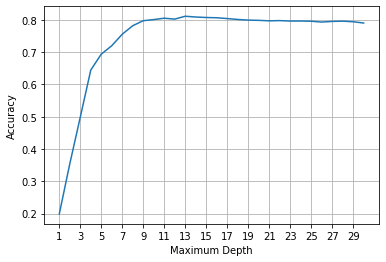

time: 863 ms (started: 2021-12-12 20:37:11 +00:00)


In [20]:
plt.plot(list(range(1,31)), dt_acc)
plt.xticks(list(range(1,31,2)))
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.grid(True)

# test_images.shape

We can see in the plot above that the accuracy starts to flatten out after a peak at 13. Thus I will run DT training with the maximum depth of 13.

In [32]:
# Decision Tree
start_dt = time.time()

tree_cls = DecisionTreeClassifier(max_depth=13, criterion='entropy')
tree_cls.fit(train_images_f, train_labels)

end_dt = time.time()
dt_time = end_dt-start_dt


time: 36.8 s (started: 2021-12-12 21:10:03 +00:00)


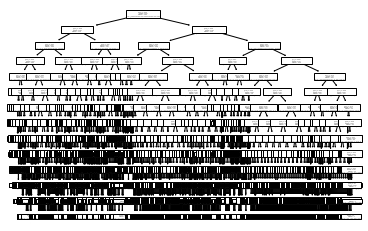

<Figure size 36000x21600 with 0 Axes>

time: 1min 34s (started: 2021-12-12 21:11:04 +00:00)


In [34]:
# dt_image=tree.fit(train_images_f,train_labels)
sklearn.tree.plot_tree(dt_image)
plt.figure(figsize=(500, 300))
plt.show()

Given the input is pixles the decision tree is not informative to the human eye. I still left it in the report as it shows that the package is capable of visualizing the decision tree.

Evaluating DT using a confusion matrix

In [35]:
dt_predictions = tree_cls.predict(test_images_f)
print(f'Decision Tree Classification Report \n Decision Tree with a Depth of 13: \n {classification_report(test_labels,dt_predictions)}')

Decision Tree Classification Report 
 Decision Tree with a Depth of 13: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1000
           1       0.96      0.94      0.95      1000
           2       0.69      0.72      0.70      1000
           3       0.83      0.80      0.82      1000
           4       0.67      0.74      0.70      1000
           5       0.92      0.90      0.91      1000
           6       0.60      0.54      0.57      1000
           7       0.88      0.89      0.88      1000
           8       0.93      0.93      0.93      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

time: 56.6 ms (started: 2021-12-12 21:13:09 +00:00)


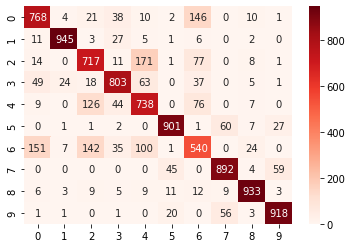

time: 647 ms (started: 2021-12-12 21:14:57 +00:00)


In [36]:
dt_confusion = confusion_matrix(test_labels, dt_predictions)
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Reds')

In [38]:
print("Accuracy:", accuracy_score(test_labels, dt_predictions))

Accuracy: 0.8155
time: 4.16 ms (started: 2021-12-12 21:17:09 +00:00)


From the confusion matrix we can see that class 1 the trousers, have the highest true positives, while the class 6, the shirt has the lowest. This can again be explained by the similarity between all long armed apparrel, which might even be confused by the human eye. The trousers and the T-shirt on the other hand, has short arms which is reflected in a more distinguished pixel distribution and a better TPR. The overall accuracy of the decision tree reached 81.55% 

In [39]:
# Random Forest
start_rf = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(train_images_f, train_labels)

end_rf = time.time()
rf_time = end_rf-start_rf


time: 2min 6s (started: 2021-12-12 21:23:30 +00:00)


In [40]:
rf_predictions = random_forest.predict(test_images_f)

time: 486 ms (started: 2021-12-12 21:25:54 +00:00)


In [41]:
rf_report = classification_report(test_labels, rf_predictions)
print('Classification Report \n Random Forest: ',rf_report)

accuracy = accuracy_score(test_labels,rf_predictions)
print("Accuracy: ",accuracy)

Classification Report 
 Random Forest:                precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.92      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

Accuracy:  0.8763
time: 39.1 ms (started: 2021-12-12 21:26:18 +00:00)


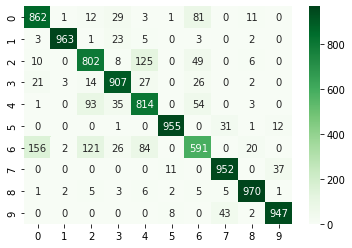

time: 661 ms (started: 2021-12-12 21:29:13 +00:00)


In [43]:
rf_confusion = confusion_matrix(test_labels, rf_predictions)
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Greens")

The random forest clasifier outperformed the decision tree by aproximately 6 percentage points with an accuracy of 87,6%. Yet again the shirt (class 6) has the lowest level of correct classifications. To see if this score can still be improved I will do a cross validation.

# 5-fold Cross Validation on Random Forest Classifier

In [52]:
X = np.vstack((test_images_f,train_images_f))
y = np.concatenate((test_labels, train_labels))
scores = cross_val_score(random_forest, X,y,cv=5, scoring='accuracy', verbose=3)
print(np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.877) total time= 2.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] END ................................ score: (test=0.881) total time= 2.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.2min remaining:    0.0s


[CV] END ................................ score: (test=0.885) total time= 2.1min
[CV] END ................................ score: (test=0.889) total time= 2.1min
[CV] END ................................ score: (test=0.884) total time= 2.1min
0.8834428571428571
time: 10min 34s (started: 2021-12-12 21:48:57 +00:00)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.6min finished


In [ ]:
# train the model on train set
svm_cls = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_cls.fit(train_images_f, train_labels)
 
# print prediction results
svm_predictions = svm_cls.predict(test_images_f)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000

time: 10min 29s (started: 2021-12-10 18:47:29 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("KNN bf Time\t\t{:0.2f} minute".format(knn_bf_time/60.0))
print("KNN kd Time \t \t{:0.2f} minute".format(knn_time_kd/60.0))
print("KNN bt Time \t \t{:0.2f} minute".format(knn_time_bt/60.0))

print("Decision Tree Time: \t{:0.2f} minute".format(dt_time/60.0))
print("Random Forest Time: \t{:0.2f} minute".format(rf_time/60.0))


KNN bf Time		0.67 minute
KNN kd Time 	 	0.67 minute
KNN bt Time 	 	0.70 minute
Decision Tree Time: 	0.61 minute
Random Forest Time: 	2.10 minute
time: 5.54 ms (started: 2021-12-12 21:47:45 +00:00)


In [ ]:
# print("SVM Time:\t {:0.2f} minute".format(svm_time/60.0))

In [ ]:
print(classification_report(test_labels, svm_predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000

time: 30.7 ms (started: 2021-12-10 18:57:58 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.classification_report(test_labels, svm_predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.10      1.00      0.18      1000

    accuracy                           0.10     10000
   macro avg       0.11      0.10      0.02     10000
weighted avg       0.11      0.10      0.02     10000

time: 32.8 ms (started: 2021-12-10 19:47:59 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM Model: Entire data set


# Total input = 70 000 samples from train_images_f
# test_size to 10% --> training size = 90%
# According to the doc it scales quadratically given the previous run I assume 
# 1 hr 20 min for grid search CVp

X_train_ten, X_test_ninty, y_train_ten, y_test_ninty  = train_test_split(
    all_images_f, all_labels, test_size = 0.90, random_state = 101, stratify=all_labels)

parameters_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'poly']}
svm_grid = GridSearchCV(SVC(),parameters_grid, refit = True, verbose = 3)
svm_grid.fit(X_train_all, y_train_all) # fitting the model for grid search

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.105 total time=  23.6s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.105 total time=  25.2s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.104 total time=  24.9s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.104 total time=  23.3s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.105 total time=  24.3s
[CV 1/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.811 total time=   2.7s
[CV 2/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.836 total time=   3.0s
[CV 3/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.824 total time=   3.1s
[CV 4/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.824 total time=   3.1s
[CV 5/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.828 total time=   2.9s
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.105 total time=  24.4s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

time: 1h 6min 18s (started: 2021-12-10 22:27:45 +00:00)


In [ ]:
# print best parameter after tuning
print(svm_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
time: 2.38 ms (started: 2021-12-10 23:34:05 +00:00)


In [ ]:
# train the model on train set
# model = SVC()
# model.fit(X_train, y_train)
 
# print prediction results
svm_grid_predictions = svm_grid.predict(X_test_all)

time: 3min 33s (started: 2021-12-10 23:34:05 +00:00)


In [ ]:
# print classification report
print(classification_report(y_test_all, svm_grid_predictions))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6341
           1       0.99      0.97      0.98      6310
           2       0.77      0.79      0.78      6279
           3       0.87      0.89      0.88      6292
           4       0.79      0.81      0.80      6290
           5       0.96      0.94      0.95      6332
           6       0.70      0.63      0.66      6307
           7       0.92      0.94      0.93      6280
           8       0.96      0.96      0.96      6267
           9       0.95      0.95      0.95      6302

    accuracy                           0.87     63000
   macro avg       0.87      0.87      0.87     63000
weighted avg       0.87      0.87      0.87     63000

time: 2min 45s (started: 2021-12-10 23:50:02 +00:00)


In [ ]:
# match labels of classes  to the predicted classes
print(metrics.classification_report(y_test_all, svm_grid_predictions)) 


              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6341
           1       0.99      0.97      0.98      6310
           2       0.77      0.79      0.78      6279
           3       0.87      0.89      0.88      6292
           4       0.79      0.81      0.80      6290
           5       0.96      0.94      0.95      6332
           6       0.70      0.63      0.66      6307
           7       0.92      0.94      0.93      6280
           8       0.96      0.96      0.96      6267
           9       0.95      0.95      0.95      6302

    accuracy                           0.87     63000
   macro avg       0.87      0.87      0.87     63000
weighted avg       0.87      0.87      0.87     63000

time: 156 ms (started: 2021-12-10 23:54:33 +00:00)


In [ ]:
# SVM report and analysis

# svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
# svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
# svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
# print("-----------------SVM Report---------------")
# print("F1 score: {}".format(svc_f1))
# print("Accuracy score: {}".format(svc_accuracy))
# print("Confusion matrix: \n", svc_cm)
# print('Plotting confusion matrix')

# plt.figure()
# plot_confusion_matrix(svc_cm, labelNames)
# plt.show()

# print(metrics.classification_report(y_test, y_pred_svc))

# Last all SVM

In [ ]:
# SVM Model: Entire data set


# Total input = 70 000 samples from train_images_f
# test_size to 40% --> training size = 60%
# given the previous run on only 10 000 took 25 minutes 5000 train / 5000 test
# I guess it will run roughly 40 (I was right)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    all_images_f, all_labels, test_size = 0.60, random_state = 101, stratify=all_labels)

svm_parameters_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'poly'], 'degree': [3,4,5,6]}
svm_grid = GridSearchCV(SVC(),svm_parameters_grid, refit = True, verbose = 3)
svm_grid.fit(X_train_all, y_train_all) # fitting the model for grid search

NameError: ignored

In [ ]:
# print prediction results
svm_grid_predictions = svm_grid.predict(X_test_all)
print(classification_report(y_test_all, svm_grid_predictions))


NameError: ignored

In [ ]:
# match labels of classes  to the predicted classes
print(metrics.classification_report(y_test_all, svm_grid_predictions)) 


# Reducing Dimensionality using PCA 

This shall make the SVM gridsearch more efficient and of course faster.

In [ ]:
# 70 000
# `stratify` makes sure that the number of each class (support) is equal for 
# each split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    all_images_f, all_labels, test_size = 0.9, random_state = 101, stratify=all_labels)

time: 319 ms (started: 2021-12-12 14:43:23 +00:00)


In [ ]:
print('train: ',X_train_all.shape)
print('tr labels: ',y_train_all.shape)

print('test: ', X_test_all.shape)
print('te labels: ',y_test_all.shape)



train:  (7000, 784)
tr labels:  (7000,)
test:  (63000, 784)
te labels:  (63000,)
time: 6.79 ms (started: 2021-12-12 19:26:05 +00:00)


(63000, 784)

time: 3.38 ms (started: 2021-12-12 19:18:45 +00:00)


## Standardizing images;

Below I show you the images before standardization:

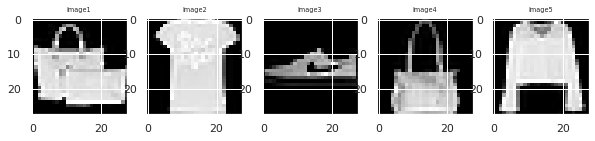

time: 1.46 s (started: 2021-12-12 14:44:43 +00:00)


In [ ]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train_all[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing
X_train_all_std = StandardScaler().fit_transform(X_train_all)
X_test_all_std = StandardScaler().fit_transform(X_test_all)

time: 941 ms (started: 2021-12-12 14:45:19 +00:00)


Below you can see the images **after** standardization and normalization;

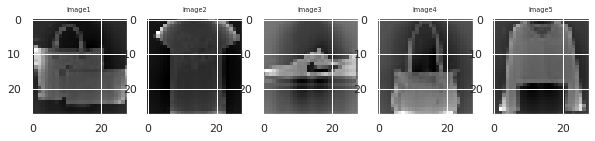

time: 1.31 s (started: 2021-12-12 14:45:46 +00:00)


In [ ]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train_all_std[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

# Computing Eigenvectors Eigenvalues and Covariance Matrix

We want to find the parameter k for PCA

PCA tries to minimize the average squared projection errors: $$\frac{1}{m} \sum^{m}_{i=1} || x^{(i)} - x^{(i)}_{approx} ||^2$$
And the total variation in the data: $$\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}||^2$$

We want to choose **k** such that it is the smallest value of the ratio between the average squared projection errors and the total variation in the data: 


$\frac{\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}-x^{(i)}_{approx}||^2}{\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}||^2} \leq 0.01$ 

So we want to retain 99% of the variance!

In [ ]:
mean_vec = np.mean(X_train_all_std, axis=0)
cov_mat = np.cov(X_train_all_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix: ", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

Shape of Covariance matrix:  (784, 784)
time: 1.22 s (started: 2021-12-12 14:46:03 +00:00)


In [ ]:
# played with k until I had 99.00 % of the variance retained.
add =0.0
for i in range(502):
    add+= var_exp[i]

print('first 502 components average variance: %.2f' % add)  

first 502 components average variance: 99.00
time: 4.28 ms (started: 2021-12-12 14:47:44 +00:00)


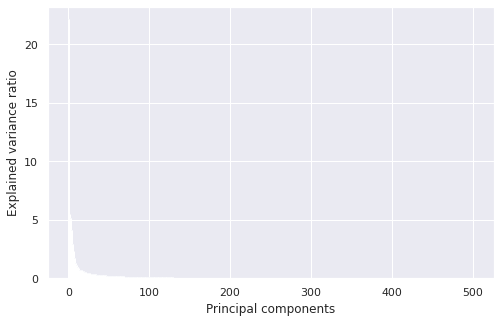

time: 1.38 s (started: 2021-12-12 14:47:50 +00:00)


In [ ]:
size = 502
plt.figure(figsize=(8,5))
plt.bar(range(size), var_exp[0:size], align='center');
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio");

# what happened to the colors???


In [ ]:
pca = PCA(n_components=502)
X_train_pca = pca.fit_transform(X_train_all_std) # input for svm.fit()
X_test_pca = pca.fit_transform(X_test_all_std) # input for svm.predict()


time: 37.4 s (started: 2021-12-12 14:47:56 +00:00)


Eigenvalues shape: (502, 784)


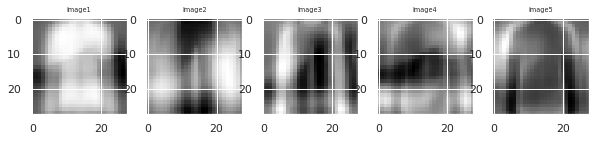

time: 1.33 s (started: 2021-12-12 14:48:34 +00:00)


In [ ]:
eigenvalues = pca.components_.reshape(502, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
# Fitting 5 folds for each of 50 candidates, totalling 250 fits

# Should take 4,5 hrs.

In [ ]:
svm_parameters_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'poly'], 'degree': [2,3,4]}
svm = GridSearchCV(SVC(),svm_parameters_grid, refit = True, verbose = 3)
svm.fit(X_train_pca, y_train_all) # fitting the model for grid search

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.360 total time=  21.7s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.351 total time=  21.5s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.352 total time=  21.6s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.258 total time=  21.7s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=rbf;, score=0.283 total time=  21.5s
[CV 1/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.865 total time=   4.6s
[CV 2/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.859 total time=   4.9s
[CV 3/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.845 total time=   4.8s
[CV 4/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.841 total time=   4.7s
[CV 5/5] END C=0.01, degree=2, gamma=1, kernel=poly;, score=0.861 total time=   4.6s
[CV 1/5] END C=0.01, degree=2, gamma=0.1, kernel=rbf;, score=0.107 total time=  21.8s
[CV 2/

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

time: 2h 16min 30s (started: 2021-12-12 14:59:47 +00:00)


In [ ]:
# print best parameter after tuning
print(svm.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm.best_estimator_)

{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
SVC(C=0.1, degree=2, gamma=0.01, kernel='poly')
time: 4.55 ms (started: 2021-12-12 17:40:56 +00:00)


In [ ]:
svm.best_score_

0.8625714285714284

time: 5.68 ms (started: 2021-12-12 17:43:59 +00:00)


In [ ]:
svm.refit_time_

3.9599649906158447

time: 3.72 ms (started: 2021-12-12 17:46:03 +00:00)


# Inspecting the Output of the Grid Search 5-fold Cross Validation 

In the output of the cell above we can see that the best performance was achieved with the following parameters: 

The best performing kernel was XXX

* C of 0.001
* $\gamma$ of 0.0001



# Predicting Labels of Testing set with the Model that had the Best Parameters:

In [ ]:
# X_train_all, X_test_all, y_train_all, y_test_all
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test_all, svm_predict))
accuracy = metrics.accuracy_score(y_test_all, svm_predict)
average_accuracy = np.mean(y_test_all == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6300
           1       0.58      0.65      0.61      6300
           2       0.27      0.27      0.27      6300
           3       0.48      0.54      0.51      6300
           4       0.41      0.25      0.31      6300
           5       0.38      0.35      0.36      6300
           6       0.25      0.31      0.27      6300
           7       0.61      0.74      0.66      6300
           8       0.80      0.75      0.78      6300
           9       0.17      0.13      0.15      6300

    accuracy                           0.47     63000
   macro avg       0.46      0.47      0.46     63000
weighted avg       0.46      0.47      0.46     63000

The average_accuracy is 46.6%
time: 54.1 s (started: 2021-12-12 17:31:27 +00:00)


In [ ]:
# SVM report and analysis
x_pred_svc_pca = svm.predict(X_train_pca)
svc_pca_f1 = metrics.f1_score(y_train_all, x_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_train_all, x_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_train_all, x_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1))
print("Accuracy score: {}".format(svc_pca_accuracy))
print("Confusion matrix: \n", svc_pca_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_train_all, x_pred_svc_pca))

-----------------SVM Report---------------
F1 score: 0.9653750149681656
Accuracy score: 0.9654285714285714
Confusion matrix: 
 [[676   0   3  12   0   0   9   0   0   0]
 [  0 690   0   7   1   0   2   0   0   0]
 [  5   0 658   7  21   0   9   0   0   0]
 [  4   0   1 681   9   0   5   0   0   0]
 [  0   0  19   9 655   0  17   0   0   0]
 [  0   0   0   0   0 696   0   4   0   0]
 [ 27   0  19  11  22   0 621   0   0   0]
 [  0   0   0   0   0   3   0 696   0   1]
 [  0   0   0   4   0   0   0   0 696   0]
 [  0   0   0   0   0   0   0  11   0 689]]
Plotting confusion matrix


NameError: ignored

<Figure size 432x288 with 0 Axes>

time: 5.58 s (started: 2021-12-12 18:35:55 +00:00)


In [ ]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))